In [2]:
#!/bin/bash
# !curl -L -o ~/Downloads/dogs-vs-cats.zip\
#   https://www.kaggle.com/api/v1/datasets/download/salader/dogs-vs-cats

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1089M  100 1089M    0     0  3593k      0  0:05:10  0:05:10 --:--:-- 3696k 0     0  3347k      0  0:05:33  0:01:23  0:04:10 3660k    0     0  3423k      0  0:05:26  0:01:44  0:03:42 3715k  0     0  3553k      0  0:05:14  0:03:28  0:01:46 3689k


In [ ]:
# from zipfile import ZipFile

# file = "/home/ree/Downloads/dogs-vs-cats.zip"

# with ZipFile(file, "r") as f:
#     f.extractall("data")

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten

2025-03-08 23:40:00.374740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741457400.388431   20653 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741457400.392275   20653 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 23:40:00.406442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Building the model

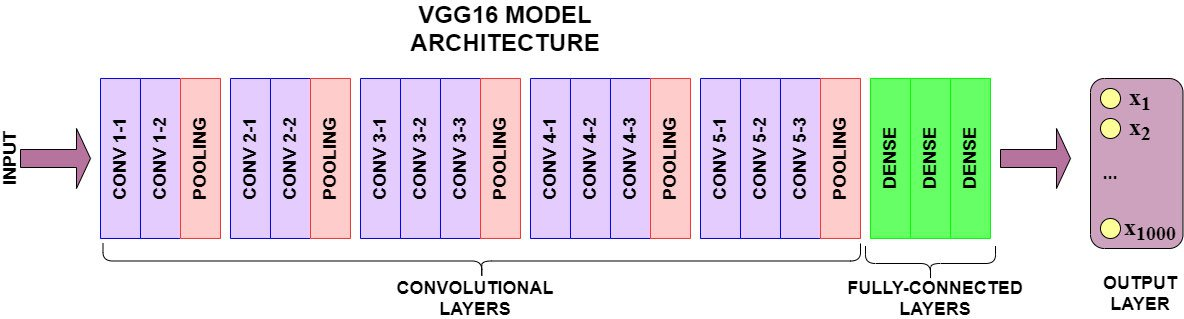

In [2]:
# Pretrained model

conv_base = VGG16(
    weights="imagenet", 
    include_top=False,              # do not include the top (i.e. the dense layers)
    input_shape=(128, 128, 3)       # set input shape
)

I0000 00:00:1741457403.882000   20653 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2614 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# As we can see only the convolution base is included
# The dense layers were not imported

In [5]:
# Now we need to freeze the Convolution base weights

# conv_base.trainable = False

In [6]:
# Now we add our Dense layers for training

model = Sequential(
    [
        conv_base,
        Flatten(),
        Dense(32, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,953 (57.14 MB)

 Trainable params: 14,977,953 (57.14 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Now we need to freeze the Convolution base weights

conv_base.trainable = False

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,953 (57.14 MB)

 Trainable params: 263,265 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# The parameters of the VGG convolution base is added to the Non Trainable parameters as we can see

### Training 
We only train the FC layers

In [13]:
# Creating generators 

from tensorflow.keras.utils import image_dataset_from_directory

train_generator = image_dataset_from_directory(
    directory="./data/train",
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),      # set the same as the input we set for VGG16
    batch_size=16
)

validation_generator = image_dataset_from_directory(
    directory="./data/test",
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),      # set the same as the input we set for VGG16
    batch_size=16
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the images (for faster training)

def normalize(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_generator = train_generator.map(normalize)
validation_generator = validation_generator.map(normalize)

In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

Epoch 1/5


2025-03-08 23:40:31.171311: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,128,128]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-08 23:40:31.295149: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,128,128]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

   3/1250 ━━━━━━━━━━━━━━━━━━━━ 1:07 54ms/step - accuracy: 0.3785 - loss: 0.9160

I0000 00:00:1741457435.154083   21087 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8392 - loss: 0.3458

2025-03-08 23:41:58.264969: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,128,128]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-08 23:41:58.345212: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,128,128]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 69ms/step - accuracy: 0.8393 - loss: 0.3457 - val_accuracy: 0.8942 - val_loss: 0.2460
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9019 - loss: 0.2278 - val_accuracy: 0.8970 - val_loss: 0.2426
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9199 - loss: 0.1943 - val_accuracy: 0.9022 - val_loss: 0.2343
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9289 - loss: 0.1728 - val_accuracy: 0.9012 - val_loss: 0.2474
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9340 - loss: 0.1580 - val_accuracy: 0.8992 - val_loss: 0.2606


In [18]:
import seaborn as sns

sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

SyntaxError: incomplete input (121720361.py, line 3)

In [ ]:
sns.lineplot(history.history["accuracy"], label="accuracy")
sns.lineplot(history.history["val_accuracy"], label="val_accuracy")

In [ ]:
# Hmm seems like the model is overfitting a bit 

# Maybe try Data augmentation
# Or dropouts and other methods